<a href="https://colab.research.google.com/github/Nathtaba/Classificador_Sentimentos_ML/blob/main/ClassificadorSentimentos_Avaliacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('rslp')
from nltk import tokenize
import seaborn as sns
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import ngrams

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [2]:
#Leitura da basa
dt = pd.read_csv("b2w.csv")
dt.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1,1


In [3]:
dt.describe()

,original_index,polarity,rating,kfold_polarity,kfold_rating
count,132373.000000,116058.000000,132373.000000,132373.000000,132373.000000
mean,66186.000000,0.691895,3.492004,4.698813,5.499921
std,38212.937929,0.461712,1.530289,3.434905,2.872311
min,0.000000,0.000000,1.000000,-1.000000,1.000000
25%,33093.000000,0.000000,2.000000,2.000000,3.000000
50%,66186.000000,1.000000,4.000000,5.000000,5.000000
75%,99279.000000,1.000000,5.000000,8.000000,8.000000
max,132372.000000,1.000000,5.000000,10.000000,10.000000


In [4]:
#Removendo as colunas que não serão usadas
avaliacoes = dt.drop(["original_index", "review_text_processed", "review_text_tokenized", "rating", "kfold_polarity", "kfold_rating"], axis=1)

In [5]:
avaliacoes.head()

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
4,Além de higiênico tem o tamanho ideal. Só falt...,NaN


In [6]:
avaliacoes.shape

(132373, 2)

In [7]:
#Remove valores nulos
avaliacoes.dropna(inplace=True, axis=0)
avaliacoes.head()

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
5,"ótmo produto atendeu as expectativas, a entreg...",1.0


In [8]:
avaliacoes['polarity'].value_counts()

polarity
1.0    80300
0.0    35758
Name: count, dtype: int64

In [9]:
#Vetorizando os dados
vetorizar = CountVectorizer(max_features=100) #limitando a 100 palavras
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 100)


In [10]:
def treinar_modelo(dados, coluna_texto, coluna_sentimento):
  vetorizar = CountVectorizer(max_features=100)
  bag_of_words = vetorizar.fit_transform(dados[coluna_texto])
  X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, dados[coluna_sentimento],stratify=dados[coluna_sentimento],random_state = 42)

  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(X_treino, y_treino)
  return regressao_logistica.score(X_teste, y_teste)


In [11]:
print(treinar_modelo(avaliacoes, "review_text", "polarity"))

0.8882302257453042


In [12]:
todas_avaliacoes = [texto for texto in avaliacoes.review_text]
todas_palavras = ' '.join(todas_avaliacoes)

Criando a Word Cloud

In [13]:
nuvem_palavras = WordCloud(width=800, height=500,max_font_size=110,collocations=False).generate(todas_palavras)

In [14]:
nuvem_palavras

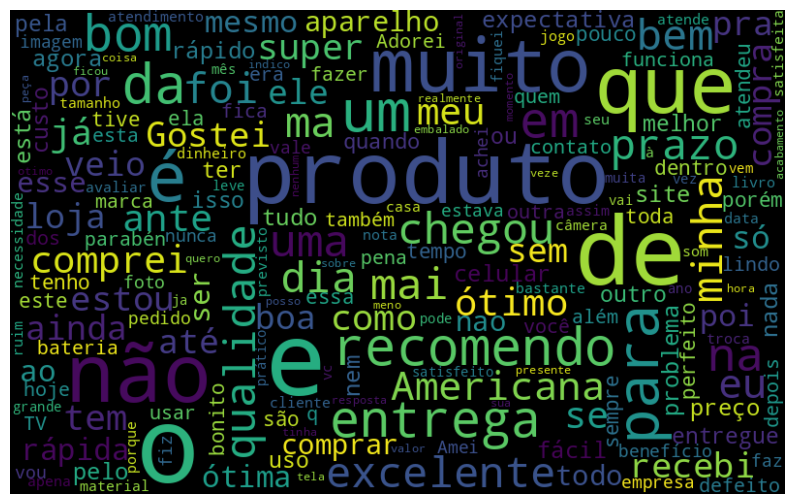

In [15]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
avaliacoes.query("polarity == 1")

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
5,"ótmo produto atendeu as expectativas, a entreg...",1.0
6,"GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, ...",1.0
...,...,...
132362,toalhas do ótima qualidade e macias. Atendeu p...,1.0
132363,O TELEVISOR É LINDO E UMA QUALIDADE DE IMAGEM ...,1.0
132364,"Tudo de bom, produto de primeira linha, goste...",1.0
132367,"Ótimo jogo, um dos melhores que joguei. Entreg...",1.0


In [17]:
def word_cloud_neg(dados, coluna_texto):
  texto_negativo = dados.query("polarity == 0")
  todas_avaliacoes = [texto for texto in texto_negativo[coluna_texto]]
  todas_palavras = ' '.join(todas_avaliacoes)
  nuvem_palavras = WordCloud(width=800, height=500,max_font_size=110,collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [18]:
def word_cloud_pos(dados, coluna_texto):
  texto_positivo = dados.query("polarity == 1")
  todas_avaliacoes = [texto for texto in texto_positivo[coluna_texto]]
  todas_palavras = ' '.join(todas_avaliacoes)
  nuvem_palavras = WordCloud(width=800, height=500,max_font_size=110,collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

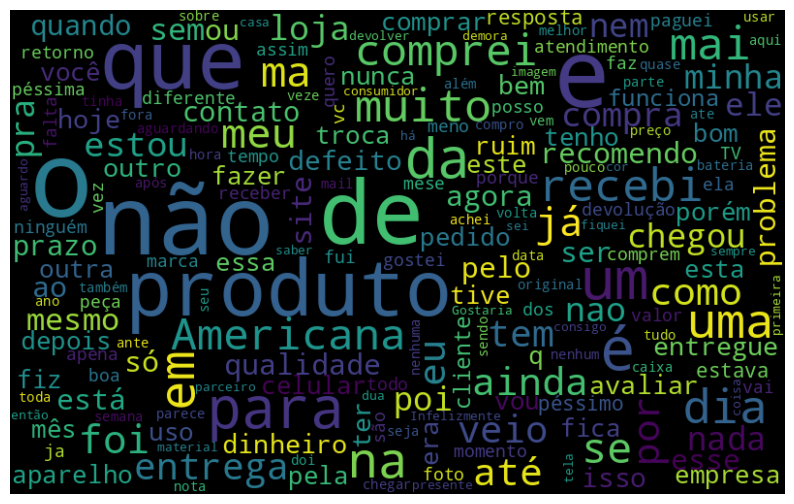

In [19]:
#Word CLoud Negativo
word_cloud_neg(avaliacoes, "review_text")

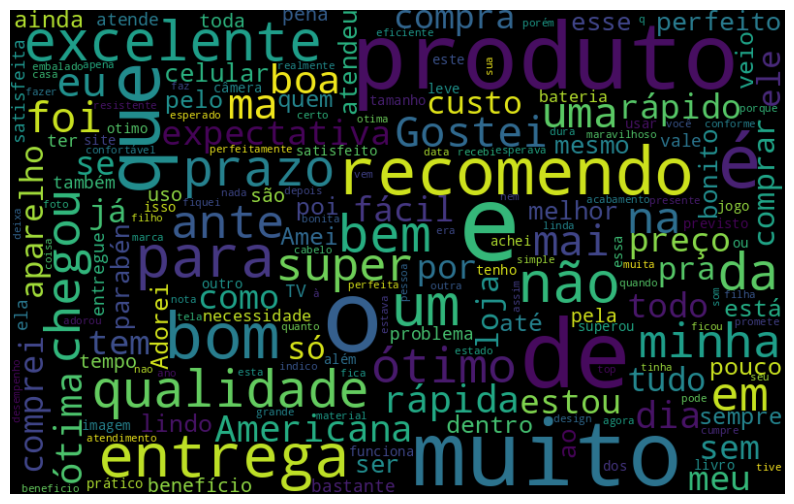

In [20]:
# Word Cloud Positivo
word_cloud_pos(avaliacoes, "review_text")

NLTK

In [21]:
token_por_espaço = tokenize.WhitespaceTokenizer()
token_dataset = token_por_espaço.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_dataset)

In [22]:
frequencia

FreqDist({'e': 89308, 'o': 76053, 'de': 75791, 'a': 66640, 'que': 53574, 'não': 44253, 'do': 36776, 'muito': 36566, 'é': 36314, 'produto': 34983, ...})

In [23]:
#Gerar uma tabela com a quantidade de cada palavra
dataframe_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                    "Frequencia": list(frequencia.values())})
dataframe_frequencia

,Palavra,Frequencia
0,Bem,413
1,macio,216
2,e,89308
3,felpudo...recomendo.,1
4,Preço,334
...,...,...
136212,fábrica'.,1
136213,SMARTHPHONE,1
136214,FANTASTICA,1
136215,poder.,1


In [24]:
#Ordena pelo maior da coluna frequencia
dataframe_frequencia.nlargest(columns = "Frequencia", n = 10)

,Palavra,Frequencia
2,e,89308
20,o,76053
17,de,75791
39,a,66640
50,que,53574
33,não,44253
23,do,36776
43,muito,36566
60,é,36314
21,produto,34983


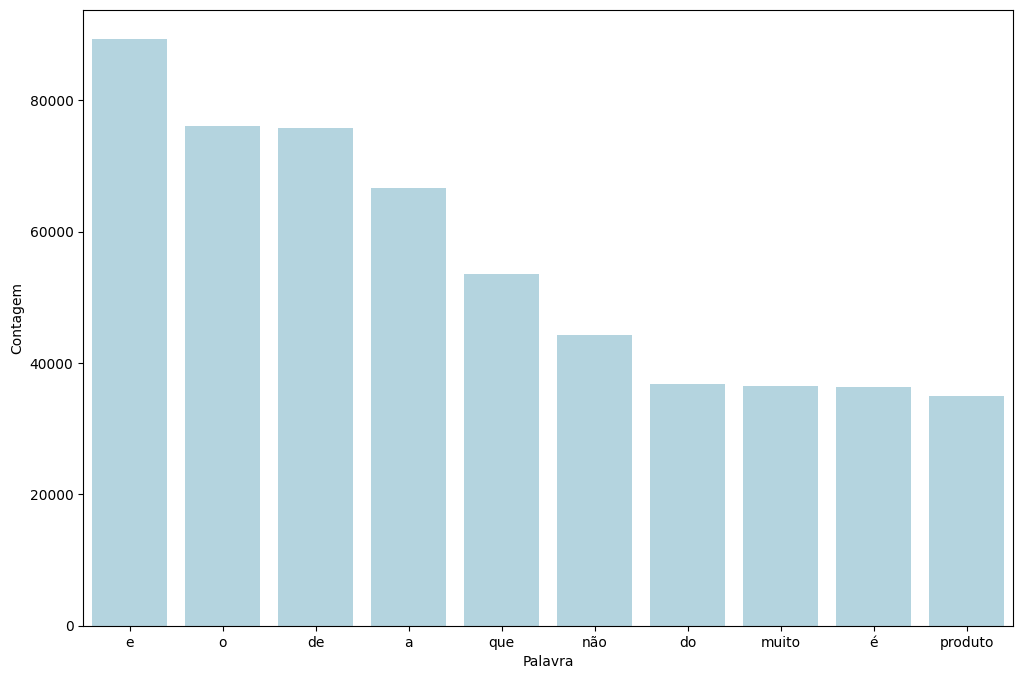

In [25]:
#Gerar grafico da tabela de frequencia
plt.figure(figsize=(12,8))
ax = sns.barplot(data = dataframe_frequencia.nlargest(columns = "Frequencia", n = 10),
                 x = "Palavra", y = "Frequencia", color = "lightblue")
ax.set(ylabel = "Contagem")
plt.show()

In [26]:
def grafico(dados, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in dados[coluna_texto]])
  token_frase = token_por_espaço.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  dataframe_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                    "Frequencia": list(frequencia.values())})
  dataframe_frequencia = dataframe_frequencia.nlargest(columns = "Frequencia",
                                                       n = quantidade)

  plt.figure(figsize=(12,8))
  ax = sns.barplot(data = dataframe_frequencia,
                  x = "Palavra", y = "Frequencia", color = "lightblue")
  ax.set(ylabel = "Contagem")
  plt.show()

In [27]:
#Retirar os stop words
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

In [28]:
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [29]:
frase_processada = list()
for avaliacao in avaliacoes.review_text:
  nova_frase = list()
  palavras_texto = token_por_espaço.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords"] = frase_processada

In [30]:
avaliacoes.head()

,review_text,polarity,texto_sem_stopwords
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0,Bem macio felpudo...recomendo. Preço imbatível...
1,Produto excepcional! recomendo!!! inovador e ...,1.0,Produto excepcional! recomendo!!! inovador gos...
2,recebi o produto antes do prazo mas veio com d...,0.0,recebi produto antes prazo veio defeito trava ...
3,Bom custo beneficio. Adequado para pessoas que...,1.0,Bom custo beneficio. Adequado pessoas fazem us...
5,"ótmo produto atendeu as expectativas, a entreg...",1.0,"ótmo produto atendeu expectativas, entrega oco..."


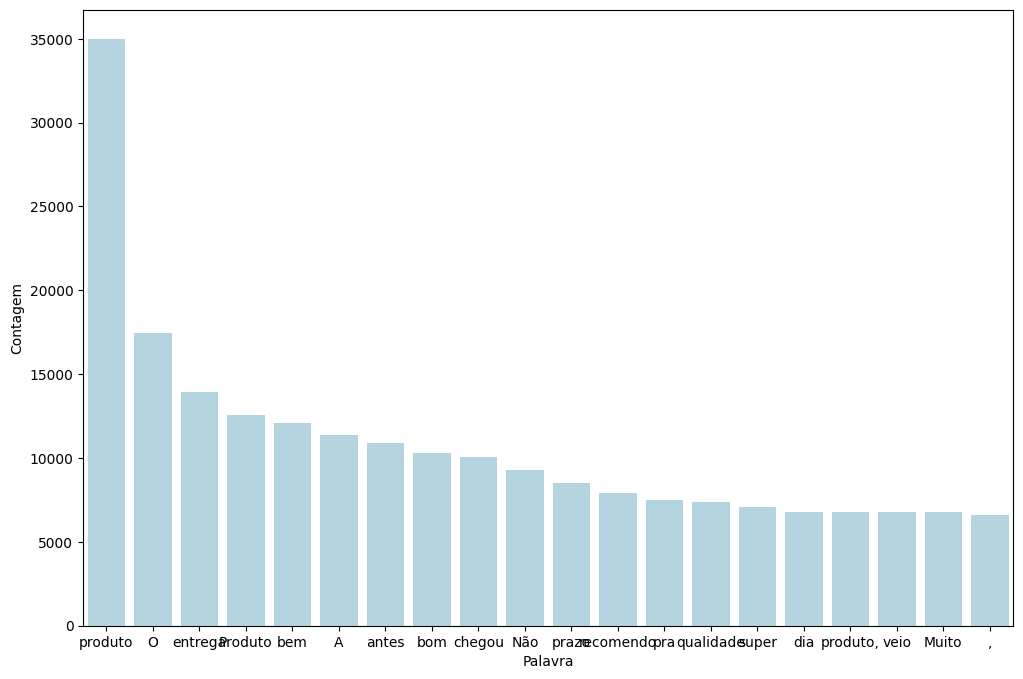

In [31]:
grafico(avaliacoes, "texto_sem_stopwords", 20)

In [32]:
pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [33]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords:
  nova_frase = list()
  palavras_texto = token_por_espaço.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords_e_pontuacao"] = frase_processada

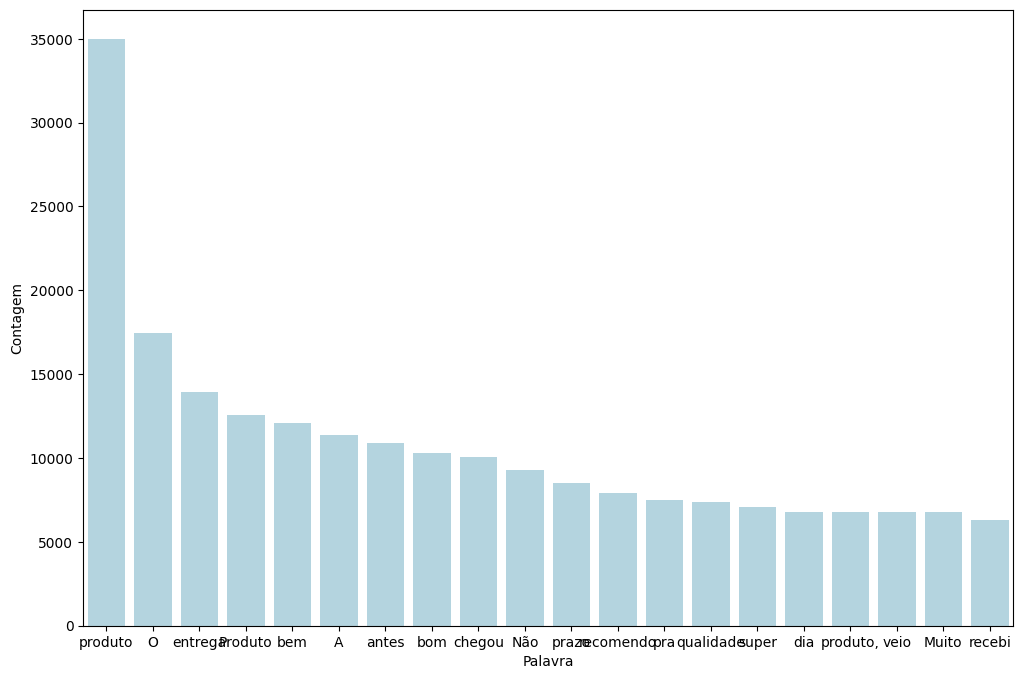

In [34]:
grafico(avaliacoes, "texto_sem_stopwords_e_pontuacao", 20)

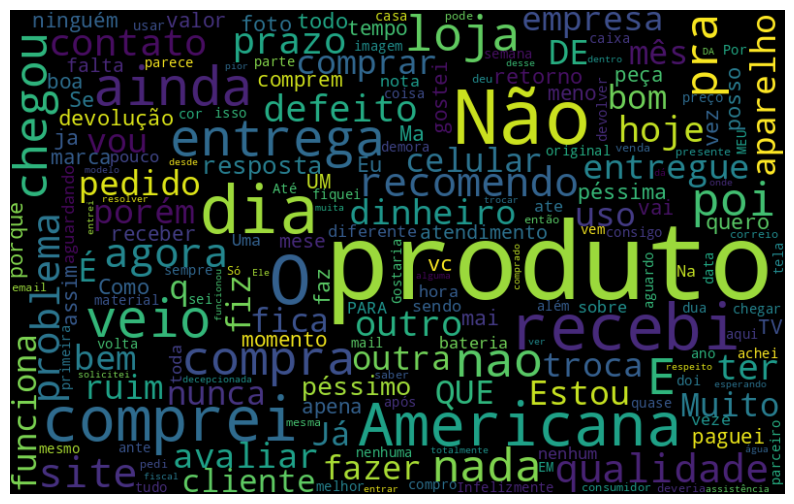

In [35]:
word_cloud_neg(avaliacoes, "texto_sem_stopwords_e_pontuacao")

In [36]:
print(treinar_modelo(avaliacoes, "texto_sem_stopwords_e_pontuacao", "polarity"))

0.8823022574530416


In [41]:
stemmer = nltk.RSLPStemmer()

In [42]:
frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao:
  nova_frase = list()
  palavras_texto = token_por_espaço.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(stemmer.stem(palavra))
  frase_processada.append(' '.join(nova_frase))


avaliacoes["texto_stemmizado"] = frase_processada

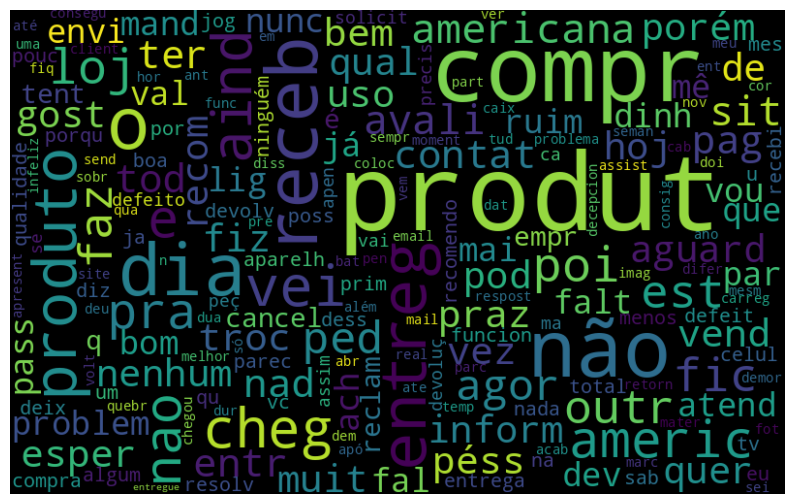

In [43]:
word_cloud_neg(avaliacoes, "texto_stemmizado")

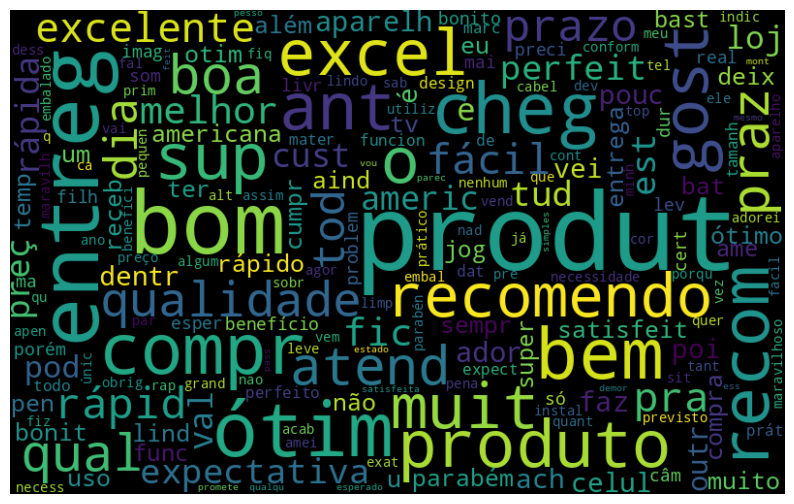

In [44]:
word_cloud_pos(avaliacoes, "texto_stemmizado")

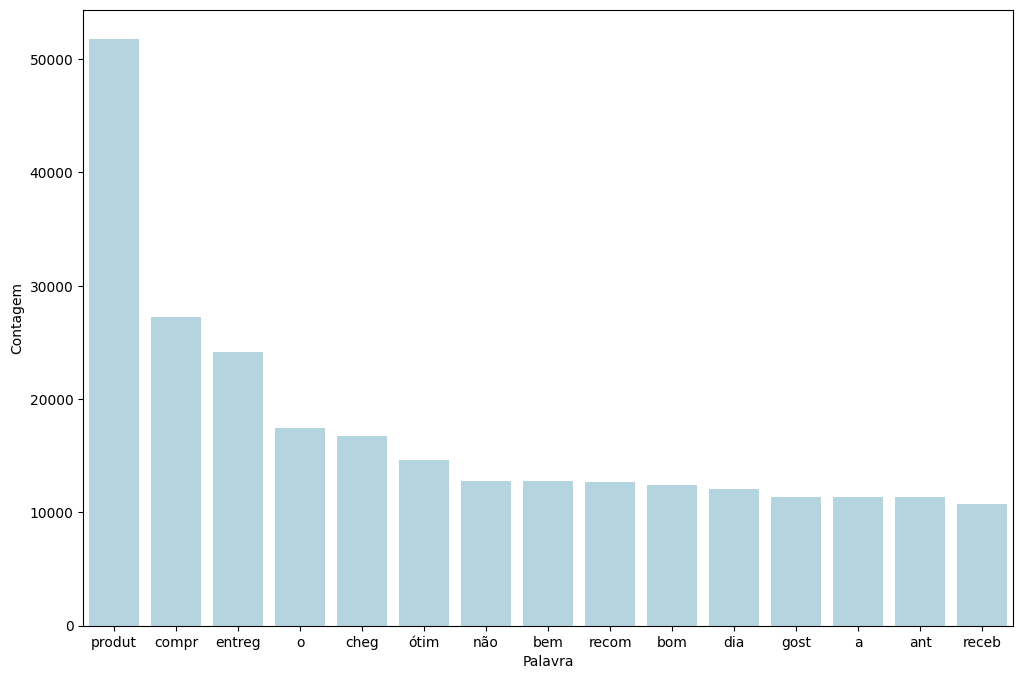

In [47]:
grafico(avaliacoes, "texto_stemmizado", 15)

In [56]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(avaliacoes.texto_stemmizado)
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              avaliacoes.polarity,
                                                              random_state = 71)

In [57]:
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_ngrams

0.9367223849732896

In [58]:
pesos = pd.DataFrame(
  regressao_logistica.coef_[0].T,
  index = tfidf.get_feature_names_out()
)

pesos.nlargest(10, 0)

,0
ótim,15.903515
excel,14.373432
bom,12.263533
excelente,10.439140
perfeit,8.679266
ador,8.566286
sup,8.067267
gost,7.786217
otim,7.641793
recom,7.579656


In [59]:
pesos.nsmallest(10, 0)

,0
não,-12.253090
péss,-9.709290
ruim,-9.146637
receb,-7.243004
vei,-7.085548
nao,-6.391910
frágil,-5.945027
devolv,-5.889682
dinh,-5.764147
não recomendo,-5.763011
